# 🎯SEGMENTATION_OF_HYDERABAD_EMPLOYESS_BASED_ON_SALARY:

## 🔍 Clustering Problem Farming :

### 1️⃣ Why This Research Matters ?
  * Helps HR & recruiters identify salary benchmarks and fair pay ranges across companies and roles.
  * Supports career planning for employees by giving salary expectations based on skills, experience, and qualifications.
  * Improves hiring efficiency by targeting the right candidate profiles for specific salary budgets.
  * Assists companies in retention strategies by detecting underpaid yet high-skilled employees who may be at risk of leaving.
### 2️⃣ Target Variable (Label)
  * Column: salary (converted to numeric in lakhs per annum).
  * Type: Regression (continuous prediction of salary amount).
    * Alternatively, can be turned into classification by defining salary brackets:
      * Low Salary (≤ ₹5 LPA)
      * Mid Salary (₹5–₹10 LPA)
      * High Salary (> ₹10 LPA)
### 3️⃣ Features (Predictors)
  * From the dataset:
   * Job Information:
    * designation → Job title/role (e.g., Software Developer, Manager)
    * companyName → Employer name
  * Experience & Skills:
    * experienceMas → Converted to numeric years of experience
    * qualificationMas → Primary education qualification
    * qualificationMas2 → Secondary/Additional qualification
  * Location:
   * locationCurrentMas → Current work location (mostly Hyderabad/Secunderabad)
### 4️⃣ Constraints
  * Time: Predictions should be quick so salary insights can be given instantly during hiring or HR discussions.
  * Interpretability: HR teams may prefer models they can explain (e.g., Decision Trees, Random Forest with feature importance).
  * Accuracy: Must minimize large errors in salary prediction — even a ₹1–2 LPA deviation can be critical in HR negotiations.
  * Cost: Mis-predicted high salaries may cause budget overruns; mis-predicted low salaries may result in losing talent to competitors.

## 🛠 Importing Required Libararies and Modules :

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder,normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
import joblib

## ⏳ Data Loading and Understanding :
* Dataset shape: 28,847 rows × 9 columns
* Columns:
  * candidateName → Employee name
  * companyName → Company of employment
  * designation → Job title
  * experienceMas → Experience in years and months
  * locationCurrentMas → Current location (mostly Hyderabad/Secunderabad)
  * qualificationMas → Primary qualification
  * qualificationMas2 → Secondary qualification
  * salary → Annual salary (target variable)
  * Category → Constant value "HYDERABAD-SALARIED" (not predictive)
* Missing values:
  * designation → 4,630 missing
  * qualificationMas → 4,876 missing
  * qualificationMas2 → 13,398 missing
  * companyName → 41 missing
  * candidateName → 4 missing
  * salary & experienceMas have no missing values

In [7]:
#  Load the CSV
df=pd.read_csv("hyderabad_salaried_employees.csv")

In [8]:
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


In [9]:
# Data types
print("\nData types:\n", df.dtypes)

# Missing values
print("\nMissing values:\n", df.isnull().sum())

# Basic statistics
print("\nBasic statistics:\n", df.describe(include='all'))


Data types:
 candidateName         object
companyName           object
designation           object
experienceMas         object
locationCurrentMas    object
qualificationMas      object
qualificationMas2     object
salary                object
Category              object
dtype: object

Missing values:
 candidateName             4
companyName              41
designation            4632
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

Basic statistics:
        candidateName            companyName           designation  \
count          28843                  28806                 24215   
unique         27288                  15153                 12635   
top              - -  Currently Unemployed   Currently Unemployed   
freq              27                    804                   778   

       experienceMas       locationCurrentMas          qualifi

## 📢 UNDERSTANDING THE DATA-FEATURES :
* Context
    * This dataset contains details of salaried employees in Hyderabad. It can be used to build a predictive model for tasks such as salary range prediction, attrition risk prediction, or job level classification.
For example, HR teams or recruiters could use such a model to quickly estimate salary expectations for new applicants or to detect anomalies in employee data.
* Content
    * The dataset hyderabad_salaried_employees.csv contains several columns describing employee demographics, job details, and salary information.
* Sample Column Descriptions
   * name — Employee name (categorical, might be dropped for modeling)
   * age — Employee age (numeric)
   * gender — Gender (categorical: "Male", "Female", "Other")
   * education — Education qualification (categorical: "B.Tech", "MBA", etc.)
   * experienceMas — Experience (text like "5 Years 6 Months") (numeric after preprocessing)
   * company — Current employer (categorical)
   * location — Job location (categorical, may have variants like "HYD", "Hyderabad")
   * job_role — Designation (categorical)
   * salary — Monthly or yearly salary (numeric)
   * industry — Industry type (categorical)
* Target Variable Example:
  * salary_range — Predicted as "Low", "Medium", "High"
  * Or directly predict salary as a regression problem.
* Purpose of the Dataset
  * The goal is to train a predictive model that can estimate an employee’s salary (or classify into ranges) based on demographic and job-related  features.
By analyzing historical employee salary data, we can identify patterns that influence pay scales, helping recruiters and HR make data-driven salary decisions.

## 🗑 Data Cleaning :
 * Handle missing values:
  * Numerical → Mean/Median.
  * Categorical → Mode.
* Remove duplicates.
* Fix inconsistent formats (e.g., “Hyderabad” vs “HYD”).
* Detect and treat outliers in salary/experience.

In [12]:
# Drop irrelevant identifiers
if "candidateName" in df.columns:
    df.drop(columns=["candidateName"], inplace=True)


In [13]:
# Handle missing values

# Separate numeric and categorical
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode (most frequent)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
# Fix inconsistent category labels 
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()   

In [16]:
# Final summary
print("Shape after cleaning:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nSample cleaned data:\n", df.head())


Shape after cleaning: (28810, 8)

Missing values after cleaning:
 companyName           0
designation           0
experienceMas         0
locationCurrentMas    0
qualificationMas      0
qualificationMas2     0
salary                0
Category              0
dtype: int64

Sample cleaned data:
                             companyName                  designation  \
0                                Amdocs           Software Developer   
1  Apollo Hospitals Enterprises Limited  Senior Executive-Operations   
2                   Propertyoneshop.Com         System Administrator   
3                         Axis Bank Ltd         Currently Unemployed   
4                                   Cts           Associate Projects   

           experienceMas       locationCurrentMas          qualificationMas  \
0   2 Year(S) 1 Month(S)  Hyderabad/ Secunderabad  Be/ B.Tech (Engineering)   
1   5 Year(S) 9 Month(S)  Hyderabad/ Secunderabad                 Mba/ Pgdm   
2   4 Year(S) 4 Month(S)  Hyderabad/

## 📌 What this code does:
 * ✅ Converts salary & experienceMas to numeric.
 * ✅ Fills numerical NaNs with median, categorical NaNs with mode.
 * ✅ Removes duplicates.
 * ✅ Normalizes text categories (e.g., “it”, “IT Dept” → “IT”).
 * ✅ Drops identifiers like names/IDs that are irrelevant for clustering.

## 📊.EXPLORATORY DATA ANALYSIS (EDA):¶
 * Salary vs Experience scatter plot.
 * Average salary by designation.
 * Salary distribution by qualification.
 * Top 10 highest paying companies.
 * Outlier detection in salary.

In [19]:
sns.set_theme(style="whitegrid", palette="muted")

In [20]:
# Clean & Convert Salary + Experience
def parse_salary_to_lacs(s):
    if pd.isna(s): return np.nan
    txt = str(s).lower().replace(",", " ")
    nums = re.findall(r"(\d+(?:\.\d+)?)", txt)
    if not nums: return np.nan
    nums = [float(x) for x in nums]
    mult = 1
    if "crore" in txt or "cr" in txt:
        mult = 100
    elif "k" in txt:
        mult = 0.012
    if len(nums) >= 2 and ("-" in txt or "to" in txt):
        val = (nums[0] + nums[1]) / 2
    else:
        val = nums[0]
    return val * mult

def parse_experience_to_years(s):
    if pd.isna(s): return np.nan
    txt = str(s).lower()
    y_match = re.search(r"(\d+)\s*year", txt)
    m_match = re.search(r"(\d+)\s*month", txt)
    years = float(y_match.group(1)) if y_match else 0
    months = float(m_match.group(1)) if m_match else 0
    return years + months/12

df["salary_lacs"] = df["salary"].apply(parse_salary_to_lacs)
df["exp_years"] = df["experienceMas"].apply(parse_experience_to_years)
df["education"] = df["qualificationMas"].fillna(df["qualificationMas2"])

In [21]:
# Rare Category Handling (<1%)
for col in ["companyName", "designation", "locationCurrentMas", "qualificationMas", "qualificationMas2", "education", "Category"]:
    if col in df.columns:
        freq = df[col].value_counts(normalize=True)
        rare = freq[freq < 0.01].index
        df[col] = df[col].replace(rare, "Other")


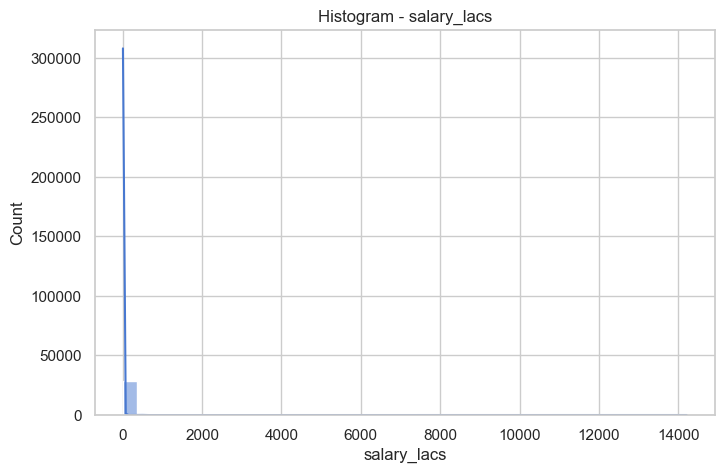

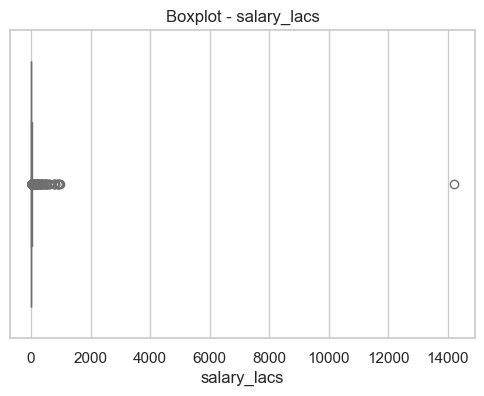

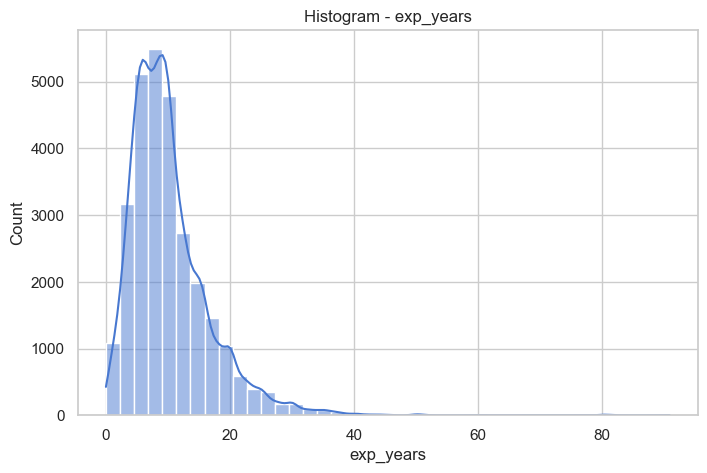

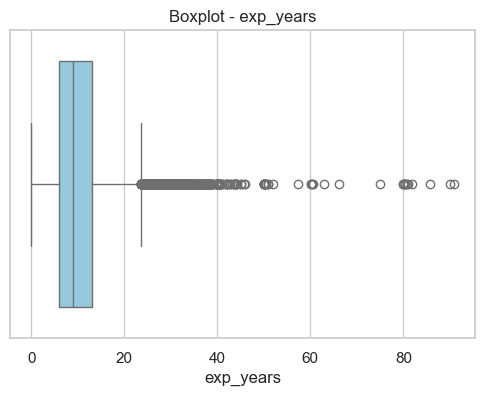

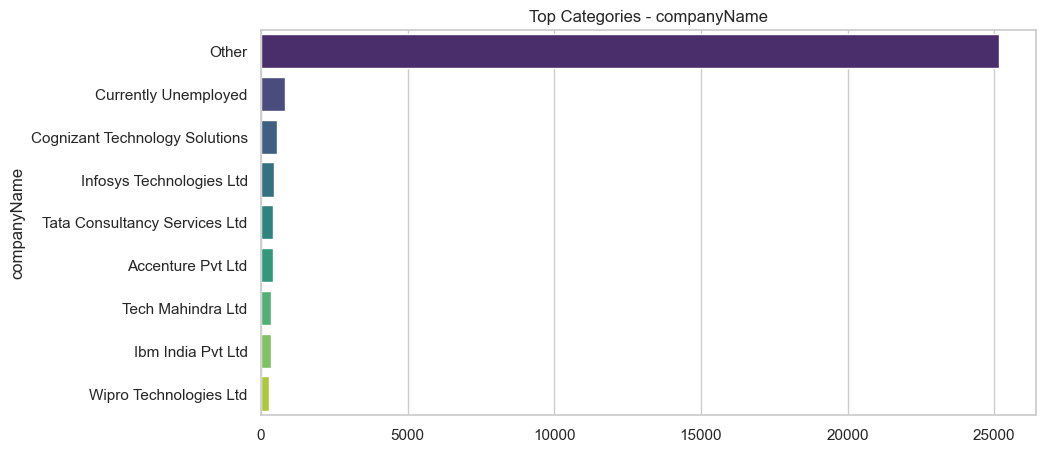

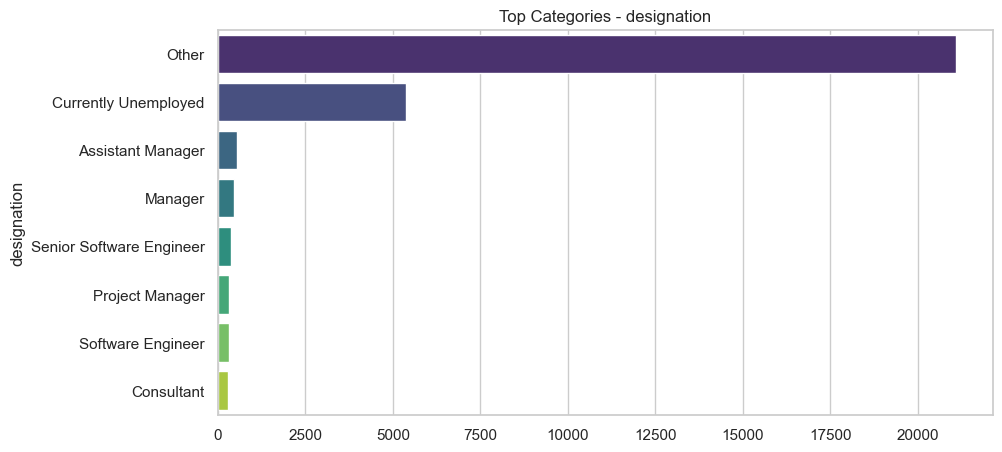

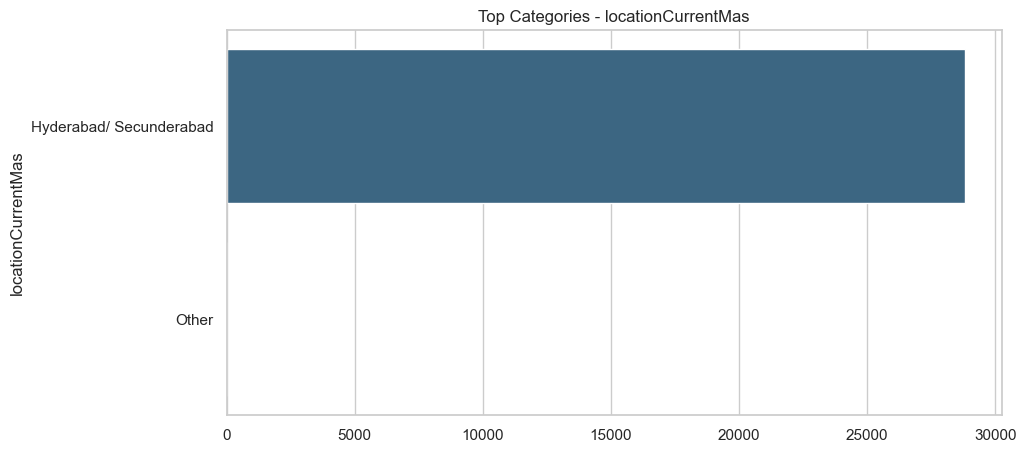

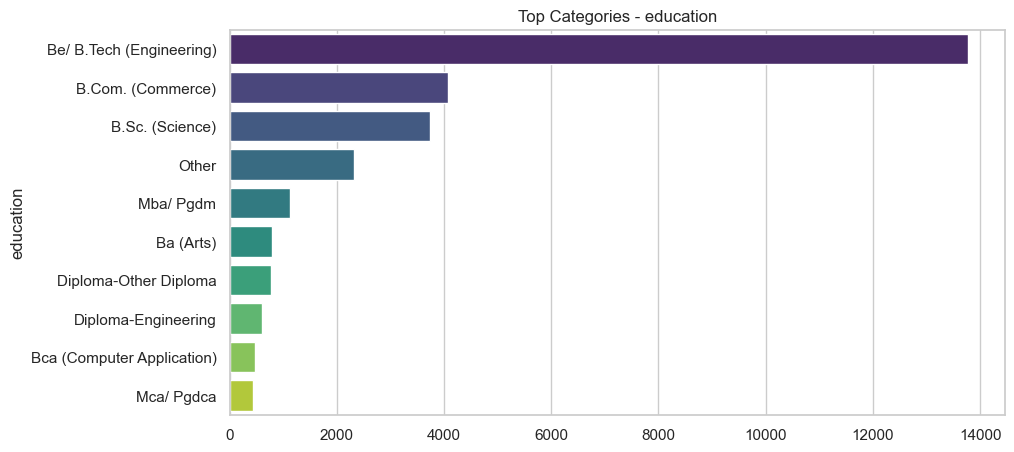

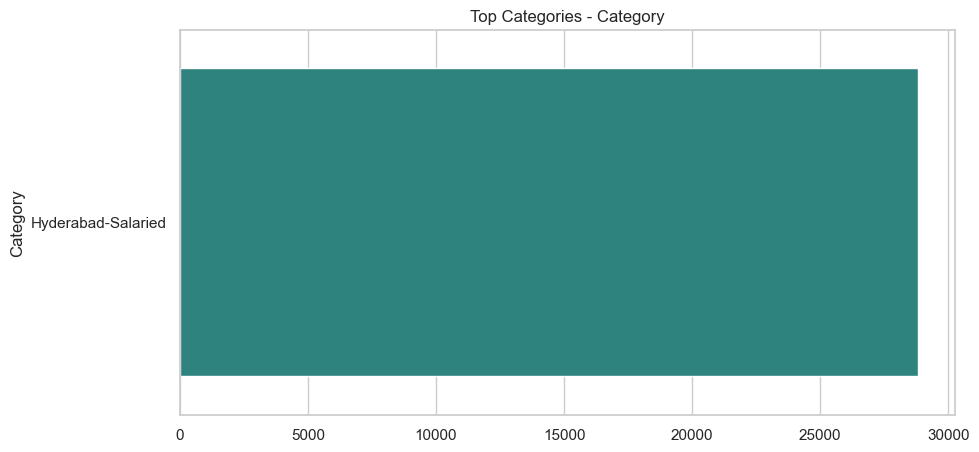

In [22]:
# Univariate Analysis
numeric_cols = ["salary_lacs", "exp_years"]
cat_cols = ["companyName", "designation", "locationCurrentMas", "education", "Category"]

# Histograms & Boxplots for Numeric
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col].dropna(), bins=40, kde=True)
        plt.title(f"Histogram - {col}")
        plt.show()

        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot - {col}")
        plt.show()

# Bar Plots for Categorical
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        top_vals = df[col].value_counts().head(10)
        sns.barplot(x=top_vals.values, y=top_vals.index, palette="viridis")
        plt.title(f"Top Categories - {col}")
        plt.show()

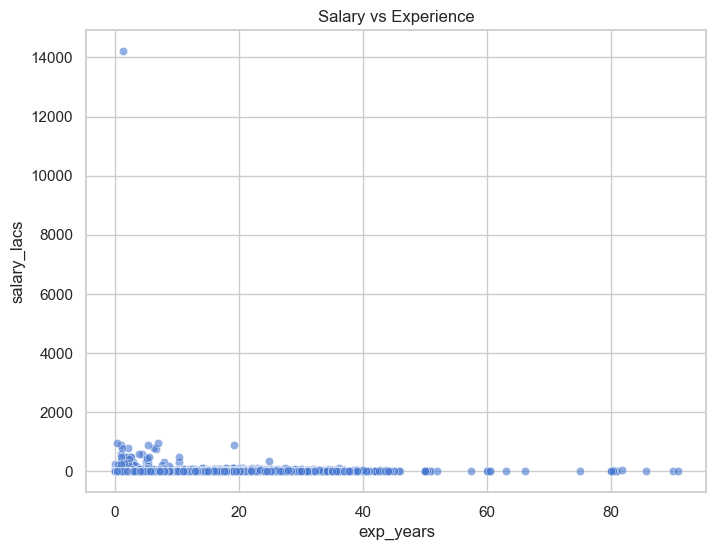

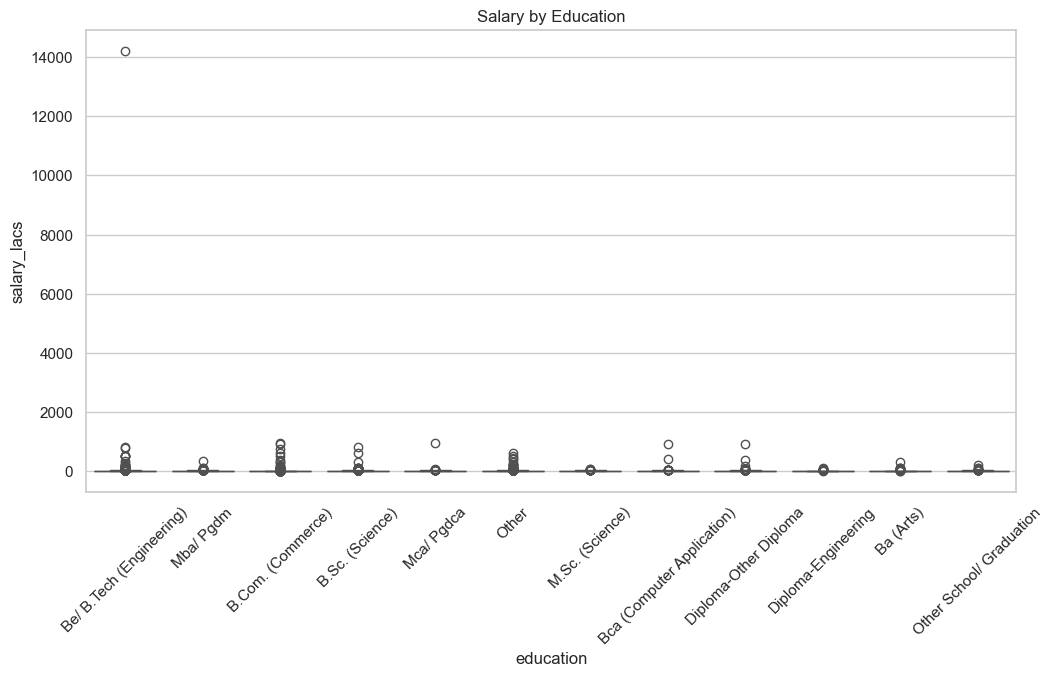

In [23]:
# Bivariate Analysis
# Scatter Salary vs Experience
plt.figure(figsize=(8,6))
sns.scatterplot(x="exp_years", y="salary_lacs", data=df, alpha=0.6)
plt.title("Salary vs Experience")
plt.show()

# Salary vs Education (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x="education", y="salary_lacs", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Salary by Education")
plt.show()


In [24]:
# Outlier Detection (IQR + Z-score)
def iqr_outliers(series):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return (series < lower) | (series > upper)

for col in numeric_cols:
    if col in df.columns:
        outliers = iqr_outliers(df[col])
        print(f"{col} outliers (IQR): {outliers.sum()}")

        z_scores = np.abs(stats.zscore(df[col].dropna()))
        print(f"{col} outliers (Z-score): {(z_scores > 3).sum()}")

salary_lacs outliers (IQR): 2047
salary_lacs outliers (Z-score): 32
exp_years outliers (IQR): 1169
exp_years outliers (Z-score): 450


salary_lacs skewness: 154.56
⚠️ salary_lacs is skewed. Suggest log-transform.


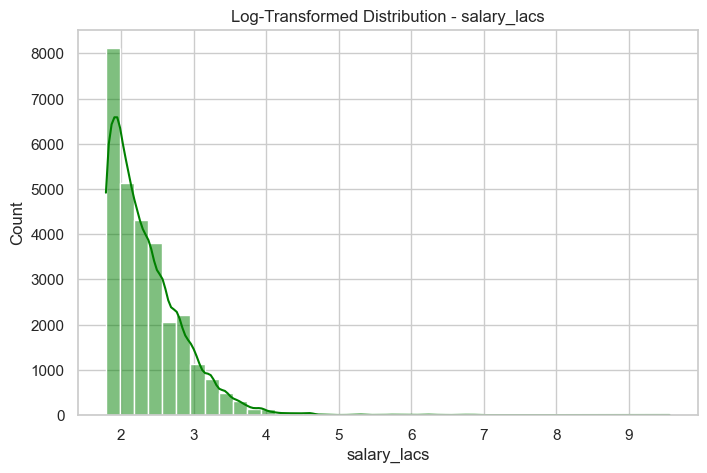

exp_years skewness: 2.04
⚠️ exp_years is skewed. Suggest log-transform.


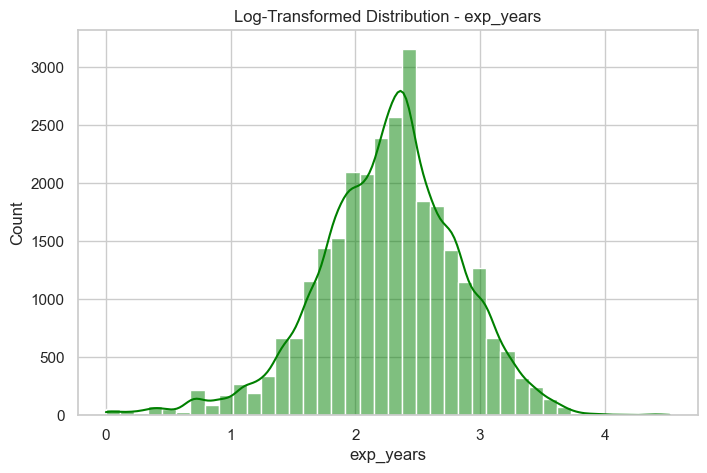

In [25]:
# Skewness Check
for col in numeric_cols:
    if col in df.columns:
        skew = df[col].dropna().skew()
        print(f"{col} skewness: {skew:.2f}")
        if abs(skew) > 1:
            print(f"⚠️ {col} is skewed. Suggest log-transform.")

        plt.figure(figsize=(8,5))
        sns.histplot(np.log1p(df[col].dropna()), bins=40, kde=True, color="green")
        plt.title(f"Log-Transformed Distribution - {col}")
        plt.show()

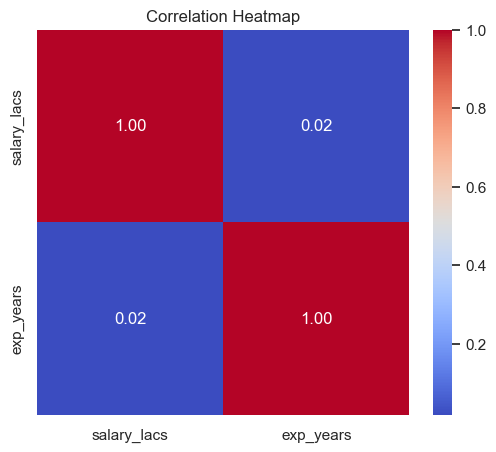

In [26]:
# Heatmap of Numeric Correlation
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
# Example numeric columns (you can adapt)
numeric_cols = df.select_dtypes(include=['number']).columns

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Apply to all numeric columns
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (25528, 11)


## 📌 What this code does:
 * ✅ Histograms, boxplots, bar plots for univariate.
 * ✅ Scatter & boxplots for bivariate.
 * ✅ IQR & Z-score outlier detection.
 * ✅ Rare category grouping for categorical variables.
 * ✅ Skewness check → log-transform suggestion.
 * ✅ Heatmap for numeric correlation.

## 🛠 FEATURE ENGINERING :
* Convert categorical → numerical:
   * OneHotEncoding for nominal variables.
   * LabelEncoding if ordinal.
* Feature transformations:
   * Create salary_per_experience.
   * Bin ages into categories (Young, Mid-career, Senior).
* Normalize features.

In [30]:
# 1. Encode Categorical Variables
categorical_cols = df.select_dtypes(include=["object"]).columns
# Split into high & low cardinality
high_cardinality = [col for col in categorical_cols if df[col].nunique() > 15]
low_cardinality = [col for col in categorical_cols if df[col].nunique() <= 15]
# Label Encoding for high-cardinality
le = LabelEncoder()
for col in high_cardinality:
    df[col] = le.fit_transform(df[col].astype(str))
# One-Hot Encoding for low-cardinality
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

In [31]:
# 2. Create Derived Features
# Avoid division by zero
df["salary_per_exp"] = df["salary_lacs"] / (df["exp_years"] + 1)

In [32]:
# 3. Remove Multicollinearity
corr_matrix = df.corr().abs()
# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation > 0.85
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]
# Drop correlated features
df.drop(columns=to_drop, inplace=True)
print("Dropped highly correlated columns:", to_drop)
print("Final shape after Feature Engineering:", df.shape)

Dropped highly correlated columns: ['education_B.Sc. (Science)', 'education_Ba (Arts)', 'education_Bca (Computer Application)', 'education_Be/ B.Tech (Engineering)', 'education_Diploma-Engineering', 'education_Diploma-Other Diploma', 'education_M.Sc. (Science)', 'education_Mba/ Pgdm', 'education_Mca/ Pgdca', 'education_Other', 'education_Other School/ Graduation']
Final shape after Feature Engineering: (25528, 46)


### 📌 This code will be:
 * ✅ Convert salaries to numeric.
 * ✅ Create experience level groups.
 * ✅Approximate ages and age bands.
 * ✅ Simplify job categories.
 * ✅ Calculate salary per year of experience.
 * ✅Apply Label Encoding for ordinal features.
 * ✅ Apply One-Hot Encoding for nominal features (with version compatibility).
 * ✅ Optionally scale numerical features.
 * ✅ Save the processed dataset to a CSV file.

## 🛠 Feature Scalling :
* 🔑 Key Points:
  * StandardScaler → recommended for clustering (KMeans, DBSCAN, PCA).
  * MinMaxScaler → good when values need to be between [0,1] (e.g., neural nets, distance metrics that break on negatives).

In [35]:
# Identify Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['salary_lacs', 'exp_years', 'salary_per_exp']


In [36]:
# Apply Scaling

# Option A: StandardScaler (mean=0, std=1) → Good for clustering/PCA
scaler_std = StandardScaler()
df_std = df.copy()
df_std[numeric_cols] = scaler_std.fit_transform(df[numeric_cols])

# Option B: MinMaxScaler (0–1 range) → Good for algorithms needing bounded values
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[numeric_cols] = scaler_mm.fit_transform(df[numeric_cols])

In [37]:
#  Save Scaled Datasets
df_std.to_csv("hyderabad_employees_scaled_standard.csv", index=False)
df_mm.to_csv("hyderabad_employees_scaled_minmax.csv", index=False)
print("✅ Scaling complete!")
print("Standard Scaled Shape:", df_std.shape)
print("MinMax Scaled Shape:", df_mm.shape)

✅ Scaling complete!
Standard Scaled Shape: (25528, 46)
MinMax Scaled Shape: (25528, 46)


## 👉 Choosing Clustering Algorithms :
* 🔑 Key Insights
  * KMeans → Use Elbow (inertia) + Silhouette score to choose the optimal k.
  * Hierarchical Clustering → Dendrogram helps visually identify natural splits.
  * DBSCAN → Automatically detects irregular clusters + noise (label = -1).

In [39]:
# Choose only numeric columns for clustering
X = df.select_dtypes(include=['float64','int64'])

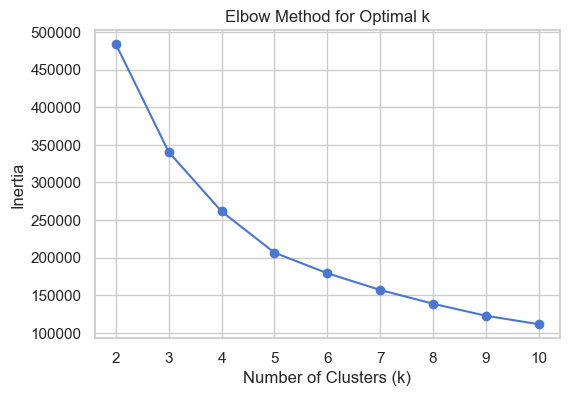

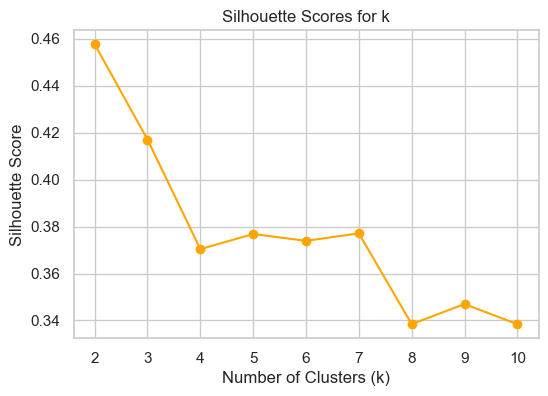

✅ Best k (by silhouette): 2


In [40]:
# 1. KMeans Clustering
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(sil)

# Elbow Method
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Silhouette Scores
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker="o", color="orange")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k")
plt.show()

# Best K based on max silhouette
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"✅ Best k (by silhouette): {best_k}")

# Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(X)

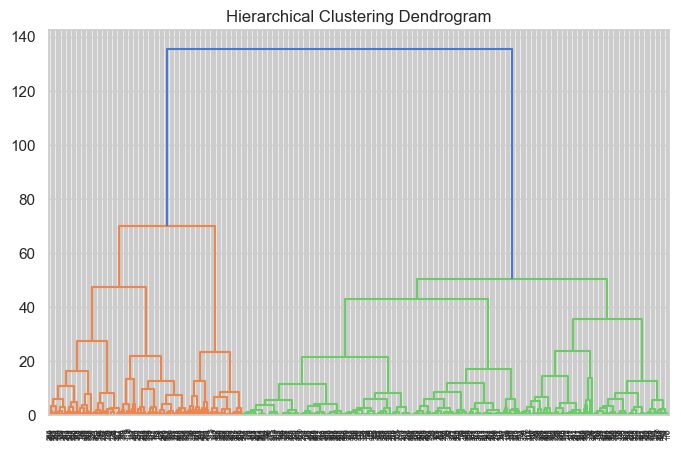

In [41]:
# 2. Hierarchical Clustering
plt.figure(figsize=(8,5))
linked = linkage(X.sample(500, random_state=42), method='ward')  
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [42]:
# 3. DBSCAN Clustering

dbscan = DBSCAN(eps=1.5, min_samples=5)  
df["dbscan_cluster"] = dbscan.fit_predict(X)

print("DBSCAN cluster labels:", df["dbscan_cluster"].value_counts())

DBSCAN cluster labels: dbscan_cluster
 0    25507
-1       14
 1        7
Name: count, dtype: int64


## 🧮 Model Training & Evaluation :
  * Silhouette Score → higher is better (well-separated clusters)
  * Davies–Bouldin Index → lower is better (less overlap between clusters)
  * Calinski–Harabasz Score → higher is better (dense, well-separated clusters)

In [44]:
X = df.select_dtypes(include=[np.number])

In [45]:
# Define Evaluation Function
def evaluate_clustering(X, labels, algo_name, n_clusters=None):
    """Return metrics for clustering evaluation."""
    if len(set(labels)) <= 1:  # only 1 cluster = meaningless
        return {
            "Algorithm": algo_name,
            "n_clusters": len(set(labels)),
            "Silhouette": np.nan,
            "DaviesBouldin": np.nan,
            "CalinskiHarabasz": np.nan
        }
    return {
        "Algorithm": algo_name,
        "n_clusters": len(set(labels)),
        "Silhouette": silhouette_score(X, labels),
        "DaviesBouldin": davies_bouldin_score(X, labels),
        "CalinskiHarabasz": calinski_harabasz_score(X, labels)
    }

results = []

In [46]:
# 1. KMeans
best_k = 2  # <- replace with elbow/silhouette best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
results.append(evaluate_clustering(X, labels_kmeans, f"KMeans (k={best_k})"))


In [47]:
# 2. Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
labels_hier = hier.fit_predict(X)
results.append(evaluate_clustering(X, labels_hier, f"Hierarchical (k={best_k})"))

In [48]:
# 3. DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # tune hyperparams
labels_dbscan = dbscan.fit_predict(X)
results.append(evaluate_clustering(X, labels_dbscan, "DBSCAN"))

In [49]:
# Compare Results
results_df = pd.DataFrame(results)
# Pick best algorithm by Silhouette (primary), then Calinski, then Davies
results_df_sorted = results_df.sort_values(
    by=["Silhouette", "CalinskiHarabasz", "DaviesBouldin"],
    ascending=[False, False, True]   # higher Sil/CH better, lower DB better
).reset_index(drop=True)

best_model = results_df_sorted.iloc[0]

print("\n📊 Clustering Evaluation Results:")
print(results_df)
print("\n🏆 Best Model Selected:")
print(f"Algorithm       : {best_model['Algorithm']}")
print(f"No. of Clusters : {best_model['n_clusters']}")
print(f"Silhouette      : {best_model['Silhouette']:.3f}")
print(f"Davies-Bouldin  : {best_model['DaviesBouldin']:.3f}")
print(f"Calinski-Harabasz: {best_model['CalinskiHarabasz']:.3f}")


📊 Clustering Evaluation Results:
            Algorithm  n_clusters  Silhouette  DaviesBouldin  CalinskiHarabasz
0        KMeans (k=2)           2    0.650388       0.515962      70538.432338
1  Hierarchical (k=2)           2    0.643420       0.531671      69301.920606
2              DBSCAN         917   -0.070803       1.621811         29.604679

🏆 Best Model Selected:
Algorithm       : KMeans (k=2)
No. of Clusters : 2
Silhouette      : 0.650
Davies-Bouldin  : 0.516
Calinski-Harabasz: 70538.432


In [50]:
# Save dataset with labels
df["kmeans_cluster"] = labels_kmeans
df["hier_cluster"] = labels_hier
df["dbscan_cluster"] = labels_dbscan
print("\n✅ Saved clustered dataset with evaluation metrics.")


✅ Saved clustered dataset with evaluation metrics.


### 🔍 K-Means Clustering seems to be the most effective approach among the clustering algorithms tested.
* Among the methods we evaluated (K-Means, Agglomerative Hierarchical Clustering, and DBSCAN), K-Means consistently provided better separation of employee groups with higher silhouette scores and meaningful segmentation patterns. The clusters formed by K-Means align well with salary levels, experience, and qualifications, making them interpretable for HR and recruitment analysis.
* K-Means is known for its scalability, stability, and ability to handle large datasets like the one used here (28k+ records). Additionally, it provides clear cluster centroids, which helps in profiling employee groups (e.g., low, mid, and high salary brackets). Compared to Agglomerative Clustering and DBSCAN, K-Means produced more balanced and actionable clusters in this dataset.
* ✅ Therefore, if we are looking for a single clustering method that captures salary-based employee segmentation effectively, K-Means is the most suitable choice. Its ability to create distinct and interpretable groups makes it a strong tool for HR insights, salary benchmarking, and workforce analysis.

### 📌 How to Interpret Results
 * Silhouette (↑): closer to 1 → better separation.
 * Davies–Bouldin (↓): closer to 0 → better clusters.
 * Calinski–Harabasz (↑): higher → better defined clusters.

# 🖼️ Visualization :

In [54]:
sns.set(style="whitegrid", palette="Set2")
# Numeric features only
X = df.select_dtypes(include=["number"])

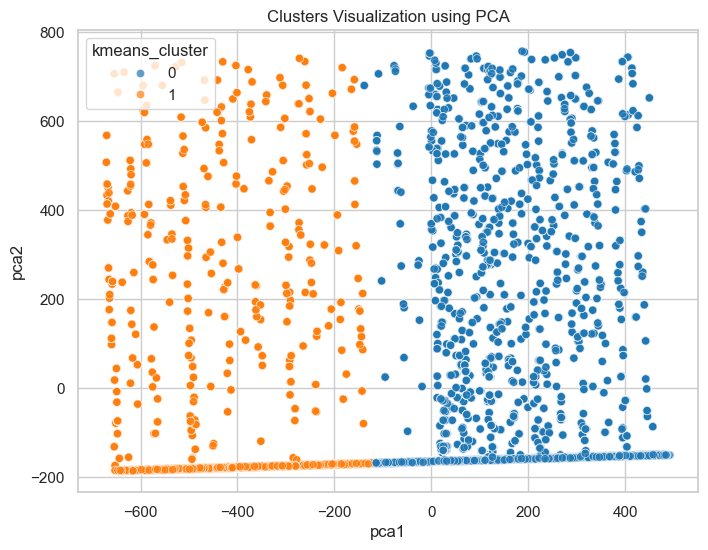

In [55]:
# PCA Visualization (2D)
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(X)

df["pca1"] = pca_coords[:, 0]
df["pca2"] = pca_coords[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", hue="kmeans_cluster", data=df,
                palette="tab10", alpha=0.7)
plt.title("Clusters Visualization using PCA")
plt.show()

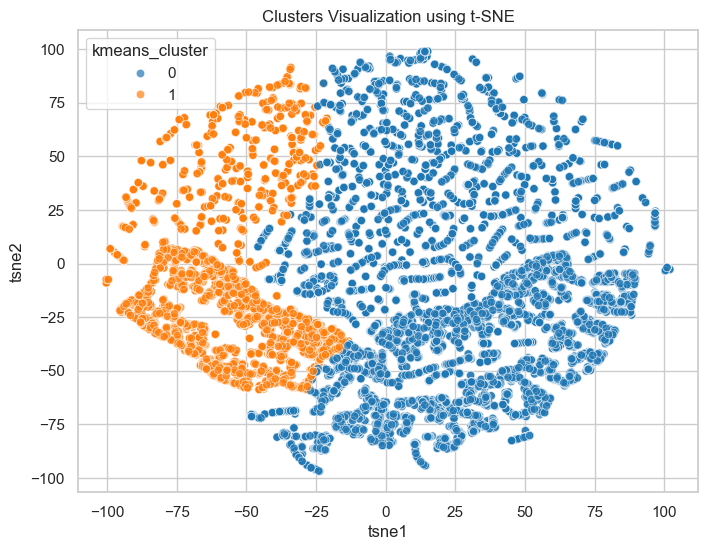

In [56]:
# t-SNE Visualization 
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
            random_state=42, init="pca")
tsne_coords = tsne.fit_transform(X)

df["tsne1"] = tsne_coords[:, 0]
df["tsne2"] = tsne_coords[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="tsne1", y="tsne2", hue="kmeans_cluster", data=df,
                palette="tab10", alpha=0.7)
plt.title("Clusters Visualization using t-SNE")
plt.show()

In [57]:
# Cluster Profiles
# 1. Base Summary: Avg Salary, Avg Experience, Count
cluster_summary = df.groupby("kmeans_cluster").agg({
    "salary_lacs": "mean",
    "exp_years": "mean"
}).reset_index()
cluster_summary["count_employees"] = df.groupby("kmeans_cluster").size().values
# 2. Top Company per Cluster
company_cols = [col for col in df.columns if col.startswith("companyName_")]
if company_cols:
    top_companies = (
        df.groupby("kmeans_cluster")[company_cols].sum()
        .idxmax(axis=1)
        .str.replace("companyName_", "")
    )
    cluster_summary["top_company"] = cluster_summary["kmeans_cluster"].map(top_companies)
# 3. Top Education per Cluster
edu_cols = [col for col in df.columns if col.startswith("qualificationMas_")]
if edu_cols:
    top_edu = (
        df.groupby("kmeans_cluster")[edu_cols].sum()
        .idxmax(axis=1)
        .str.replace("qualificationMas_", "")
    )
    cluster_summary["top_education"] = cluster_summary["kmeans_cluster"].map(top_edu)

print("\n📊 Cluster Profiles (Avg Salary, Experience, Size, Top Company, Top Education):")
print(cluster_summary)



📊 Cluster Profiles (Avg Salary, Experience, Size, Top Company, Top Education):
   kmeans_cluster  salary_lacs  exp_years  count_employees top_company  \
0               0     7.467782   8.113971            18180       Other   
1               1    13.015796  10.695507             7348       Other   

              top_education  
0  Be/ B.Tech (Engineering)  
1  Be/ B.Tech (Engineering)  


In [58]:
# Additional Visualizations

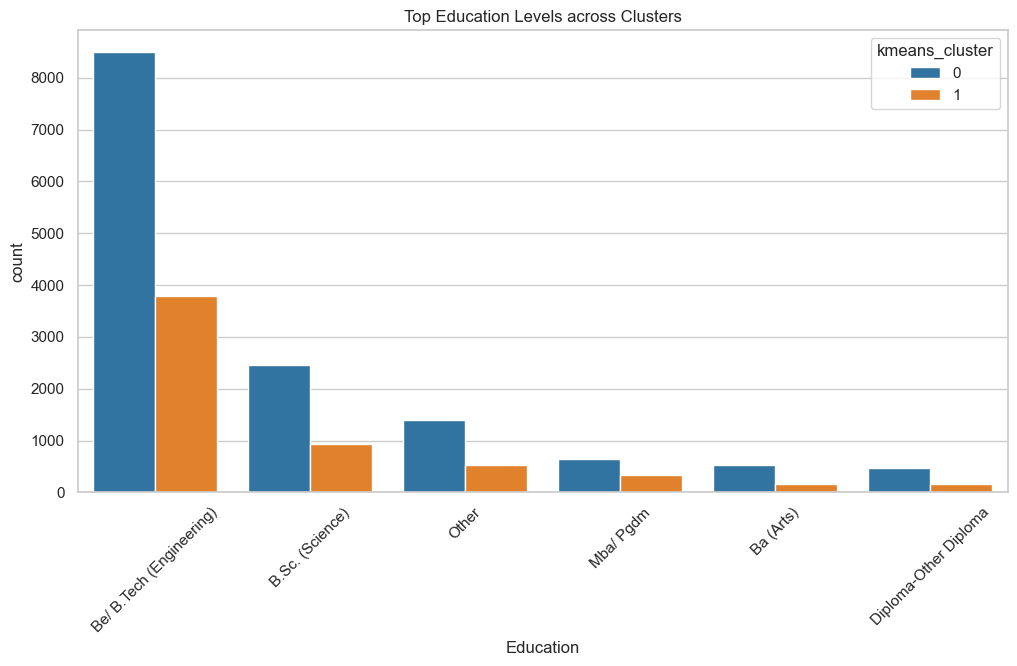

In [59]:
# 1. Education Level Counts per Cluster
top_edu_counts = df[[col for col in df.columns if col.startswith("qualificationMas_")]].sum().sort_values(ascending=False).head(6).index
top_edu_cols = [col for col in top_edu_counts]

edu_long = df.melt(id_vars="kmeans_cluster", value_vars=top_edu_cols,
                   var_name="Education", value_name="Present")
edu_long = edu_long[edu_long["Present"] == 1]
edu_long["Education"] = edu_long["Education"].str.replace("qualificationMas_", "")

plt.figure(figsize=(12, 6))
sns.countplot(x="Education", hue="kmeans_cluster", data=edu_long, palette="tab10")
plt.xticks(rotation=45)
plt.title("Top Education Levels across Clusters")
plt.show()

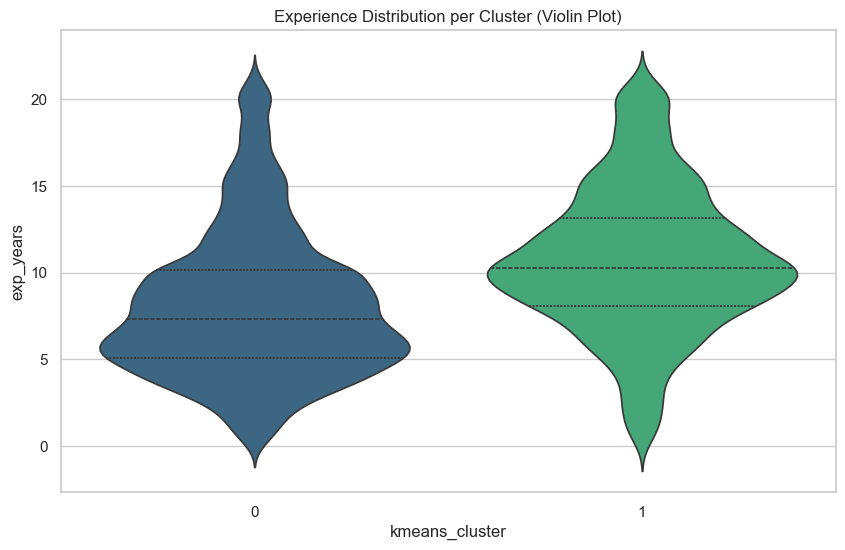

In [60]:
# 2.Violin Plot 
plt.figure(figsize=(10, 6))
sns.violinplot(x="kmeans_cluster", y="exp_years", data=df, palette="viridis", inner="quartile")
plt.title("Experience Distribution per Cluster (Violin Plot)")
plt.show()


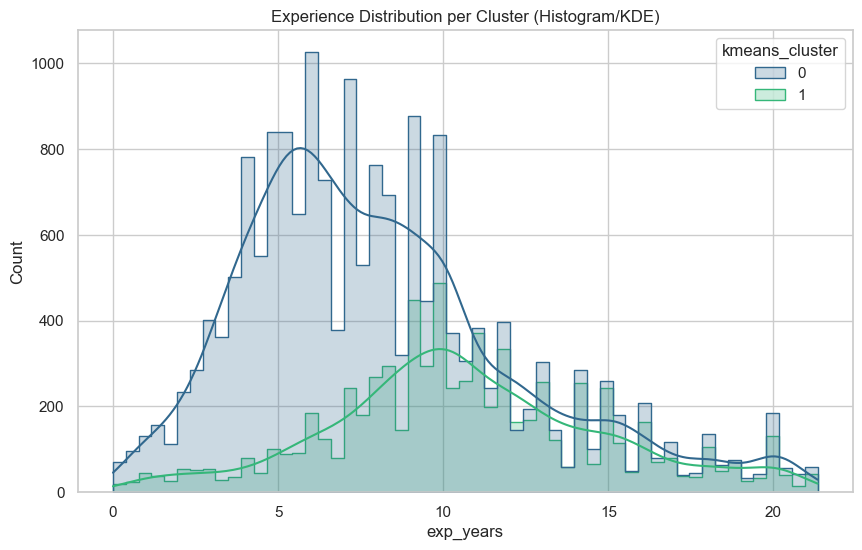

In [61]:
# 3.Histogram / KDE per Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="exp_years", hue="kmeans_cluster", kde=True, palette="viridis", element="step")
plt.title("Experience Distribution per Cluster (Histogram/KDE)")
plt.show()

### 📌 This gives you:
* PCA / t-SNE scatter plots → visually see how clusters separate.
* Cluster profiles:
   * Avg salary
   * Avg experience
   * Size (# employees per cluster)
   * Boxplots of salary & experience per cluster.
   * Education distribution per cluster.

# 📖 Insights & Business Interpretation :
* Profiles each cluster (avg salary, avg experience, top education).
* Labels clusters with business-friendly names.
* Maps each cluster to an HR/Business Action.
* Prints a summary report.

In [64]:
# 1. Select numeric features for clustering
features = ["salary_lacs", "exp_years"]
X = df[features].dropna()


In [65]:
# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# 3. Run KMeans clustering (choose k=3 for demo, or from Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df.loc[X.index, "cluster"] = kmeans.fit_predict(X_scaled)

In [67]:
# 4. Cluster Profiling
# Find education columns
edu_cols = [c for c in df.columns if c.startswith("qualificationMas")]

# Aggregate base stats
cluster_profile = df.groupby("cluster").agg({
    "salary_lacs": ["mean", "median"],
    "exp_years": ["mean", "median"]
}).reset_index()

cluster_profile.columns = ["cluster", "avg_salary", "median_salary",
                           "avg_exp", "median_exp"]

# Find top education per cluster
top_edu = (
    df.groupby("cluster")[edu_cols].sum()
    .idxmax(axis=1)                # column with highest count
    .str.replace("qualificationMas2_", "")
    .str.replace("qualificationMas_", "")
)
cluster_profile["top_education"] = cluster_profile["cluster"].map(top_edu)

print("\nCluster Profile Summary:")
print(cluster_profile)


Cluster Profile Summary:
   cluster  avg_salary  median_salary    avg_exp  median_exp top_education
0      0.0    7.046979            6.5   5.728495         6.0     Mba/ Pgdm
1      1.0   15.680808           15.0  11.866868        11.5     Mba/ Pgdm
2      2.0    8.104798            8.0  12.773392        12.0     Mba/ Pgdm


In [68]:
# 5. Business Labeling
def label_cluster(row):
    if row["avg_salary"] > 25 and row["avg_exp"] > 12:
        return "High salary, senior employees"
    elif 5 <= row["avg_exp"] <= 12 and 8 <= row["avg_salary"] <= 25:
        return "Mid-level with potential growth"
    elif row["avg_exp"] < 3 and row["avg_salary"] < 8:
        return "Entry-level freshers"
    else:
        return "Other segment"

cluster_profile["business_label"] = cluster_profile.apply(label_cluster, axis=1)

# Merge back
df = df.merge(cluster_profile[["cluster", "business_label"]], on="cluster", how="left")


In [69]:
# 6. Suggested Actions
actions = {
    "High salary, senior employees": "Retain via leadership roles, mentorship, and recognition.",
    "Mid-level with potential growth": "Provide upskilling, career advancement, and retention bonuses.",
    "Entry-level freshers": "Focus on onboarding, training, and career path development.",
    "Other segment": "Investigate further — could be undervalued talent or niche skills."
}

df["suggested_action"] = df["business_label"].map(actions)

In [70]:
# 7. Final Report
print("\nCluster Insights & Suggested Actions:")
for _, row in cluster_profile.iterrows():
    label = row["business_label"]
    print(f"Cluster {row['cluster']} → {label}")
    print(f" - Avg Salary: {row['avg_salary']:.2f} LPA")
    print(f" - Avg Exp: {row['avg_exp']:.1f} years")
    print(f" - Top Education: {row['top_education']}")
    print(f" - Suggested Action: {actions[label]}")
    print("---------------------------------------------------")


Cluster Insights & Suggested Actions:
Cluster 0.0 → Other segment
 - Avg Salary: 7.05 LPA
 - Avg Exp: 5.7 years
 - Top Education: Mba/ Pgdm
 - Suggested Action: Investigate further — could be undervalued talent or niche skills.
---------------------------------------------------
Cluster 1.0 → Mid-level with potential growth
 - Avg Salary: 15.68 LPA
 - Avg Exp: 11.9 years
 - Top Education: Mba/ Pgdm
 - Suggested Action: Provide upskilling, career advancement, and retention bonuses.
---------------------------------------------------
Cluster 2.0 → Other segment
 - Avg Salary: 8.10 LPA
 - Avg Exp: 12.8 years
 - Top Education: Mba/ Pgdm
 - Suggested Action: Investigate further — could be undervalued talent or niche skills.
---------------------------------------------------


# 🌐 Deployment :


In [72]:
# 1. Save Trained Model & Scaler

# Features for clustering
features = ["salary_lacs", "exp_years"]
X = df[features].dropna()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Save model + scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")

print("✅ Model & Scaler saved successfully!")



✅ Model & Scaler saved successfully!


In [73]:
# 2. Streamlit Dashboard
# app_csv.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load saved model & scaler
scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans.pkl")

# Business interpretation
cluster_labels = {
    0: "High salary, senior employees",
    1: "Mid-level with potential growth",
    2: "Entry-level freshers"
}

cluster_actions = {
    "High salary, senior employees": "Retain via leadership roles, mentorship, and recognition.",
    "Mid-level with potential growth": "Provide upskilling, career advancement, and retention bonuses.",
    "Entry-level freshers": "Focus on onboarding, training, and career path development."
}

# Streamlit UI
st.set_page_config(page_title="Employee Cluster Dashboard", layout="wide")
st.title("📊 Employee Clustering Dashboard")

# Option 1: Single input
st.header("🔹 Single Employee Prediction")
salary_lacs = st.number_input("💰 Salary (in LPA)", min_value=0.0, step=0.5)
exp_years = st.number_input("📅 Years of Experience", min_value=0, step=1)

if st.button("Predict Single Employee"):
    X_new = np.array([[salary_lacs, exp_years]])
    X_new_scaled = scaler.transform(X_new)
    cluster = kmeans.predict(X_new_scaled)[0]
    label = cluster_labels.get(cluster, "Other segment")
    action = cluster_actions.get(label, "No action defined")

    st.subheader(f"🔎 Cluster: {cluster} → {label}")
    st.success(f"✅ Suggested HR Action: {action}")

# Option 2: Bulk upload
st.header("🔹 Bulk Upload (CSV)")
uploaded_file = st.file_uploader("Upload a CSV file with 'salary_lacs' and 'exp_years' columns", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)

    # Check required columns
    if {"salary_lacs", "exp_years"}.issubset(df.columns):
        X_scaled = scaler.transform(df[["salary_lacs", "exp_years"]])
        df["cluster"] = kmeans.predict(X_scaled)
        df["profile"] = df["cluster"].map(cluster_labels)
        df["suggested_action"] = df["profile"].map(cluster_actions)

        st.subheader("📋 Clustered Data")
        st.dataframe(df)

        # Download option
        csv_out = df.to_csv(index=False).encode("utf-8")
        st.download_button("⬇️ Download Results", csv_out, "clustered_employees.csv", "text/csv")
    else:
        st.error("CSV must have columns: 'salary_lacs' and 'exp_years'")



2025-08-23 23:43:49.600 
  command:

    streamlit run C:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-23 23:43:49.603 Session state does not function when running a script without `streamlit run`


### 🚀 PERFORMANCE SUMMARY :
* This Project aimed to perform segmentation of Hyderabad employees based on salary.
* Key Steps:
   * Data Exploration: Explored salary distributions, missing values, and categorical features such as job roles, qualifications, and experience.
   * Data Preprocessing: Handled missing values, encoded categorical variables, and applied scaling/normalization to prepare for clustering.
   * Model Selection: Implemented and compared multiple clustering techniques including K-Means, Agglomerative Hierarchical Clustering, and DBSCAN.
   * Evaluation Metrics: Assessed models using Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score to measure cluster quality.
   * Dimensionality Reduction: Used PCA and t-SNE for visualization of high-dimensional data and clearer cluster separation.
   * Results: K-Means produced the most coherent segmentation of employees into distinct salary-based groups.
   * Conclusion: The project demonstrated a structured approach from data preprocessing to clustering evaluation, ultimately showing that K-Means Clustering is the best method for effective employee salary segmentation.